In [172]:
#importando as bibliotecas

import numpy as np
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels
from sklearn.linear_model import LinearRegression

In [173]:
#Baixando os dataframes
wine_red = pd.read_csv('winequality-red.csv', sep= ';')
wine_white = pd.read_csv('winequality-white.csv', sep= ';')

In [174]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [175]:
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [176]:
#Criando uma coluna para definir o tipo do vinho no dataframe 'vermelho'
wine_red=wine_red.assign(types='red')
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,types
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [177]:
#Criando uma coluna para definir o tipo do vinho no dataframe 'branco'
wine_white=wine_white.assign(types='white')
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,types
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [178]:
#Unindo os 2 dataframes
winnerQualityRedAndWhite = pd.merge(wine_white, wine_red, how='outer')

In [179]:
#Dataframes associados
winnerQualityRedAndWhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,types
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
3,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
4,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white


In [180]:
winnerQualityRedAndWhite.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,types
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
2,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
3,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
4,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red
6493,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6494,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [181]:
#ler o conjunto de dados de qualidade do vinho e ver suas informações


In [182]:
# Usando o describe 
winnerQualityRedAndWhite.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [183]:
# Verificando se há dados nulos e quais tipos de dados
winnerQualityRedAndWhite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  types                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


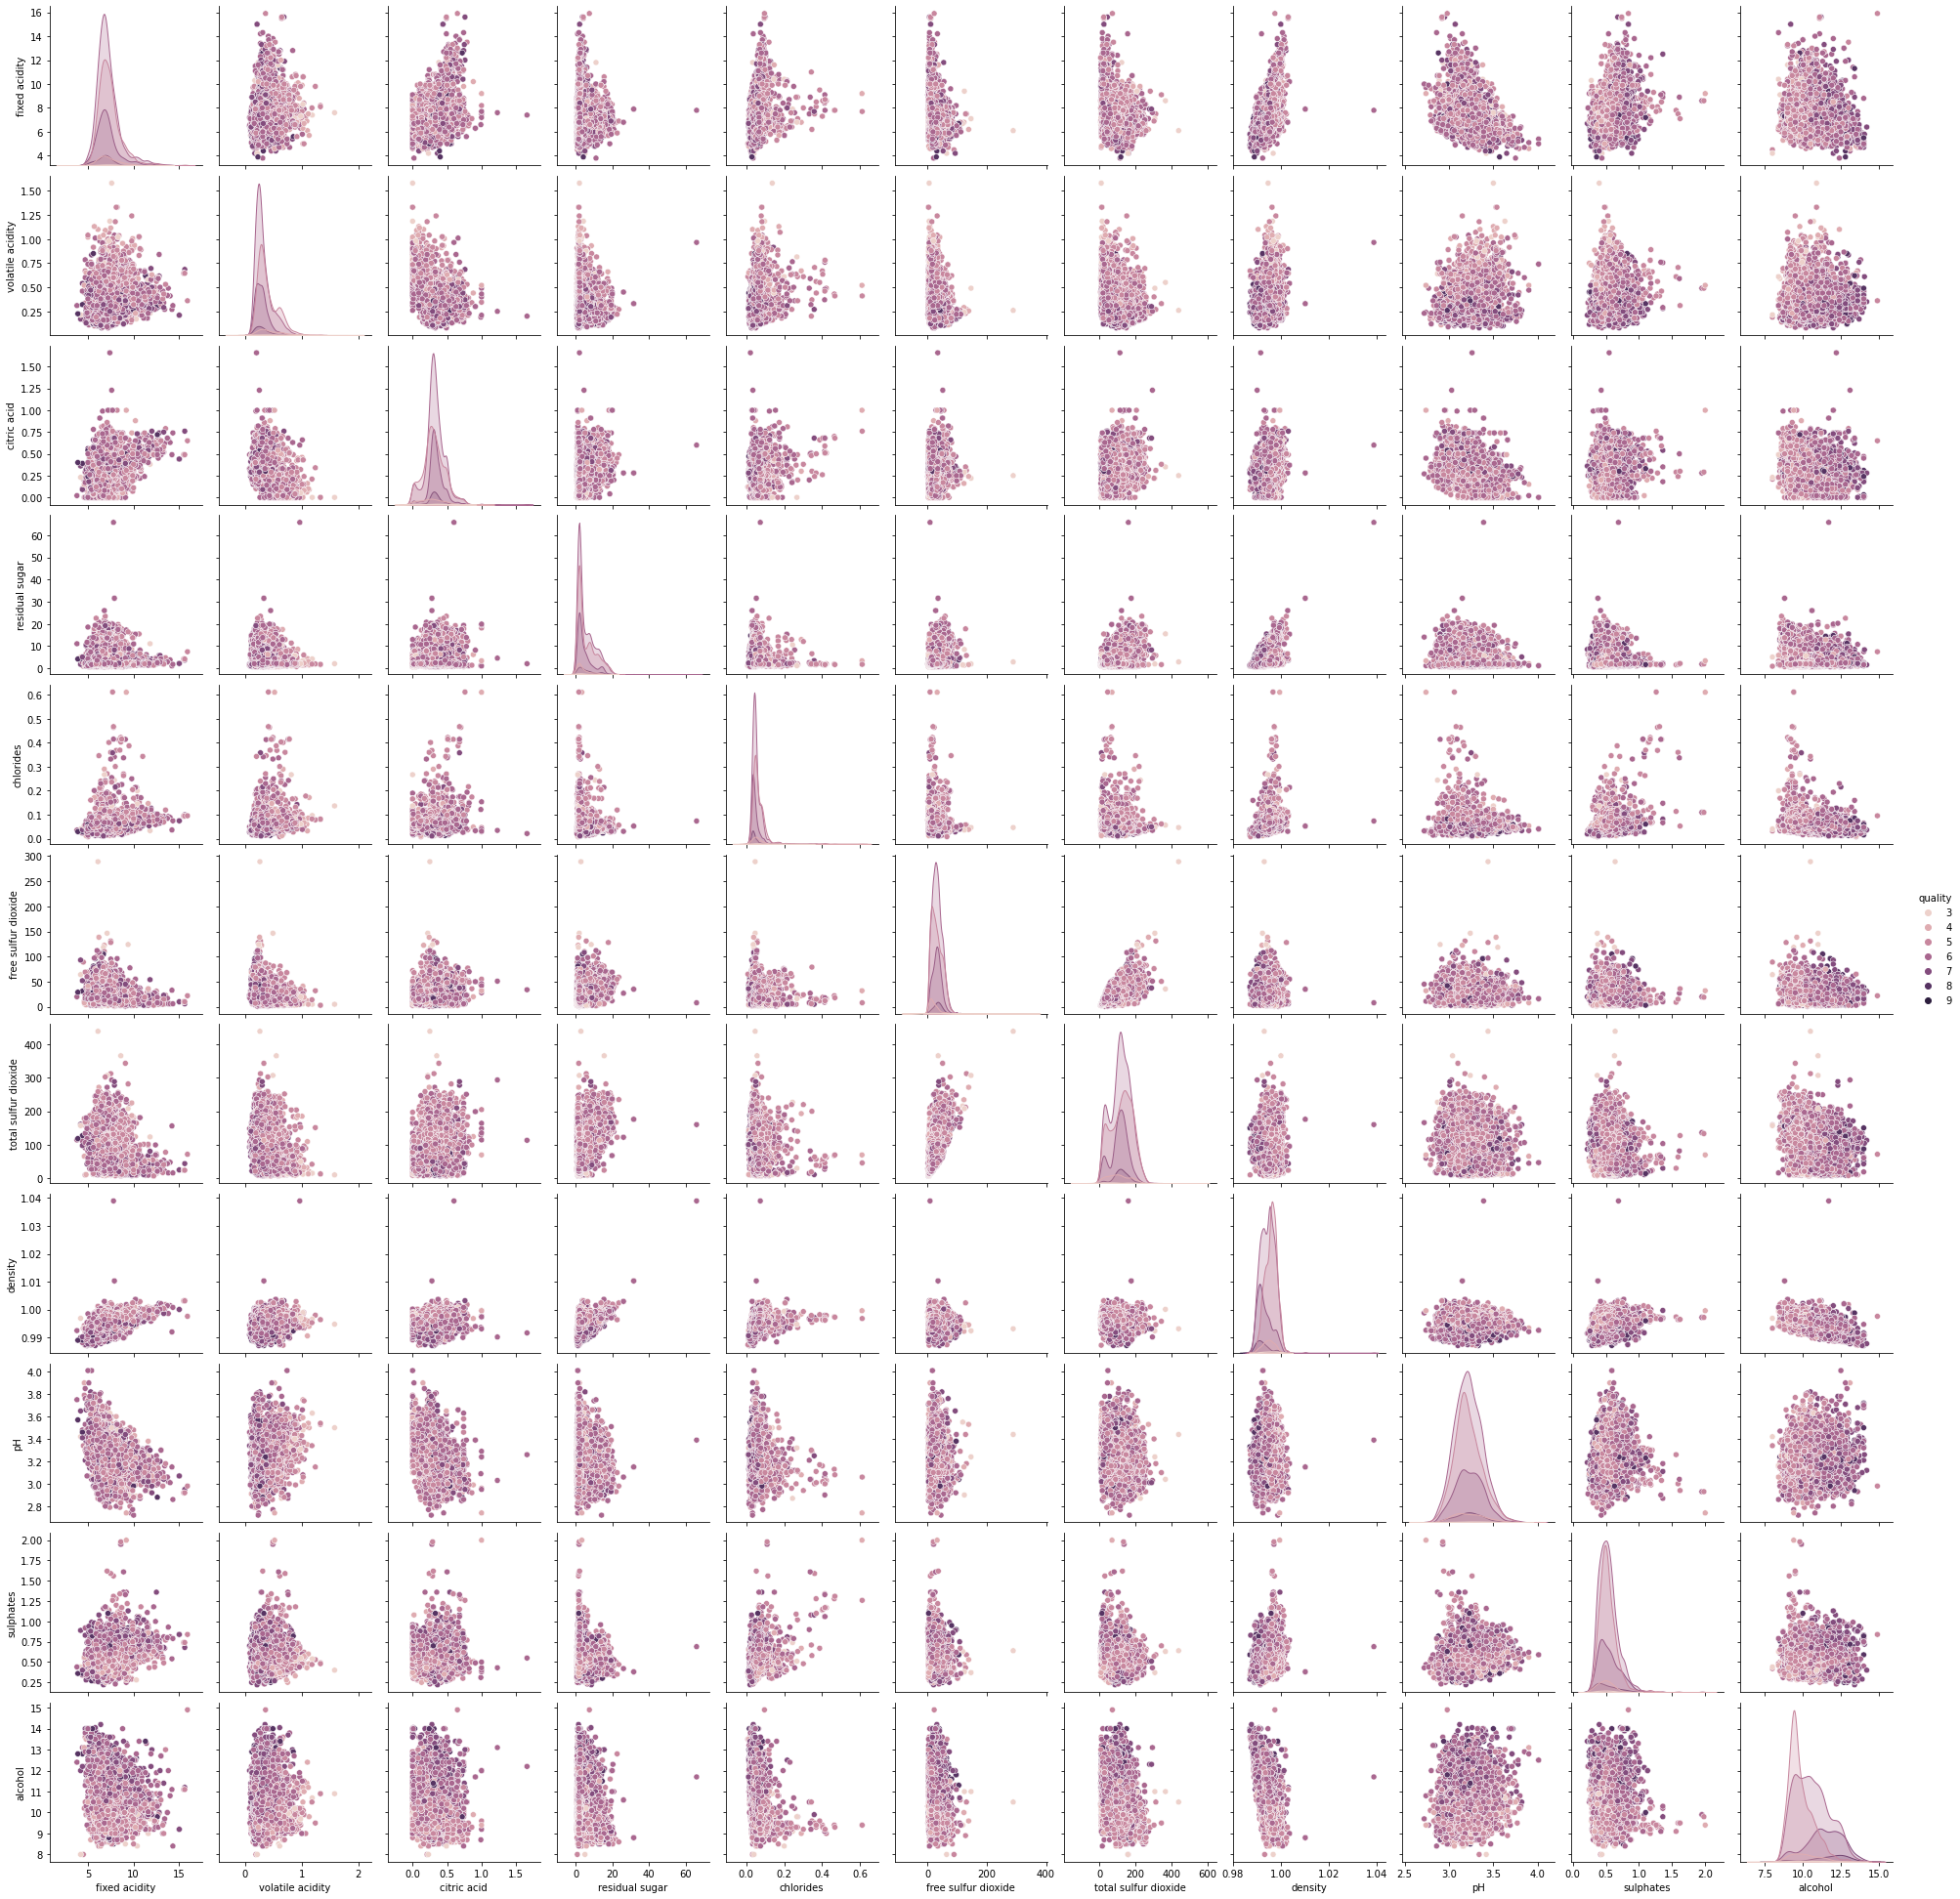

In [184]:
sns.pairplot(winnerQualityRedAndWhite,diag_kind = "kde", hue="quality")

In [185]:
# distribuição  de probabilidade de poison

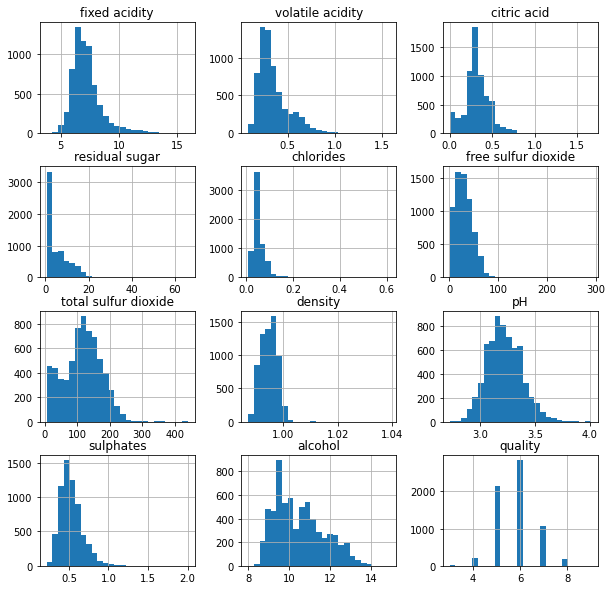

In [186]:
winnerQualityRedAndWhite.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

Text(0, 0.5, 'alcohol')

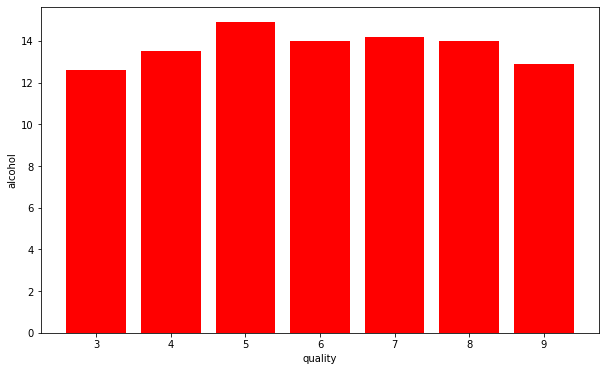

In [269]:
plt.figure(figsize=[10,6])
#grafico de barras
plt.bar(winnerQualityRedAndWhite['quality'],winnerQualityRedAndWhite['alcohol'],color='red')
#label x
plt.xlabel('quality')
#label em y
plt.ylabel('alcohol')

In [189]:
#analisando a qualidade ddo vinho em função de seu teor alcolico

<AxesSubplot:>

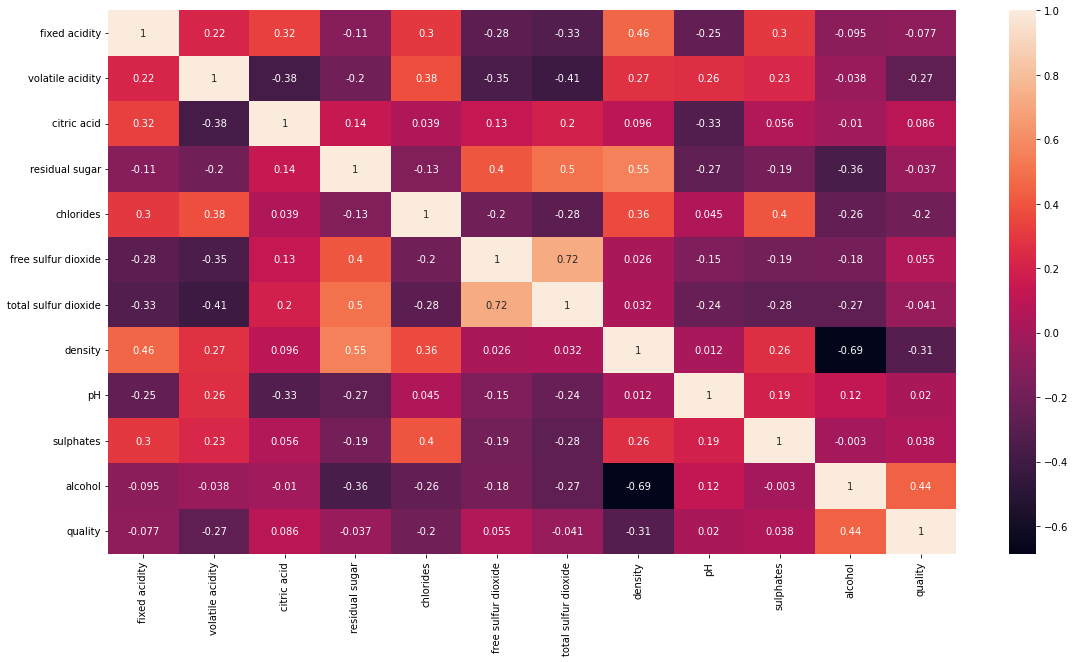

In [270]:
# plotando heatmap
plt.figure(figsize=[19,10],)
sns.heatmap(winnerQualityRedAndWhite.corr(),annot=True)


#correlação entre as variaveis

In [271]:
# a correlaçõa isolada de cada coluna com a qualidade não é o suficiente para gerar um modelo preditivo bom
# vamos usar de um tópico da ciencia de dados para isso: feature enginer
#analisaremos a corelação entre as colunas para achar uma relação melhor que explique a qualidade em funçaõ de ambas
#mas antes devemos elimnar o que tiver correlaçao "alta" com as demais colunas diferentes de qualidade

In [276]:
#tentativa e erro
for a in range(len(winnerQualityRedAndWhite.corr().columns)):
    for b in range(a):
        if abs(winnerQualityRedAndWhite.corr().iloc[a,b]) >0.7:
            name = winnerQualityRedAndWhite.corr().columns[a]
            print(name)

total sulfur dioxide


In [277]:
# a coluna 'total sulfur dioxide' esta impactando na correlação dos dados, portanto devemos exclui-la

In [278]:
new_dataframe=winnerQualityRedAndWhite.drop('total sulfur dioxide',axis=1)

In [279]:
#filtrando os valores nulos no datafrema, dropamos as linhas com valores nulos

In [280]:
new_dataframe.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
types                  0
dtype: int64

In [281]:
new_dataframe.update(new_dataframe.fillna(new_dataframe.mean()))

C:\Users\perei\AppData\Local\Temp/ipykernel_7420/4028953482.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_dataframe.update(new_dataframe.fillna(new_dataframe.mean()))


In [282]:
new_dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,types
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,white
1,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,white
2,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,white
3,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,white
4,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,white


In [283]:
#com isso temops valores puramente numéricos para serem trabalhados
#com excessão da coluna types que é a variavel categorica alvo
#faremos um tratamento especial para essa coluna
#matamos um panda para cada linha dropada na coluna types
#salvem os pandas

#atribuiremos os valores de 0 e 1 para os vinhos branco e vermelho

In [284]:
# variaveis categoricas
next_dataframe = pd.get_dummies(new_dataframe,drop_first=True)
# exibindo novo dataframe
next_dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,types_white
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6,1
1,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6,1
2,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6,1
3,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6,1
4,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6,0
6493,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,0
6494,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,0


In [285]:
next_dataframe['best quality'] = [ 1 if x>=7 else 0 for x in winnerQualityRedAndWhite.quality] 
print(next_dataframe['best quality'])

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: best quality, Length: 6497, dtype: int64


In [286]:
next_dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,types_white,best quality
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1,0
1,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1,0
2,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1,0
3,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1,0
4,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1,0


In [287]:
#uma vez tratado os dados do dataframe podemos começar a pensar em eleborar um modelo de regressão linear

In [288]:
#como temos quality como variavel alvo 'excluiremos' ela do conjuto de dados 
features = [c for c in next_dataframe.columns if c != "quality"]
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'types_white',
 'best quality']

In [289]:
#esplitando dataframe em treino e teste
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(next_dataframe[features],next_dataframe['quality'],test_size=0.2,random_state=40)

In [290]:

from sklearn.preprocessing import MinMaxScaler
# craindo um dataframe noramlaizado
norm = MinMaxScaler()
# treinamento de dados
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# exibir valores (comparar com os valores reais)
print(new_xtrain)

[[0.34710744 0.1        0.22289157 ... 0.26086957 1.         0.        ]
 [0.2231405  0.16666667 0.22891566 ... 0.68115942 1.         0.        ]
 [0.24793388 0.06666667 0.18072289 ... 0.14492754 1.         1.        ]
 ...
 [0.33884298 0.38666667 0.         ... 0.2173913  0.         0.        ]
 [0.24793388 0.34       0.06024096 ... 0.24637681 0.         0.        ]
 [0.19008264 0.16666667 0.19277108 ... 0.2173913  1.         0.        ]]


In [291]:
linear_regression = LinearRegression()

In [292]:
linear_regression.fit(x_test, y_test)

LinearRegression()

In [293]:
predict = linear_regression.predict(x_test)

In [294]:
from sklearn.metrics import mean_squared_error

In [297]:
#erro quadratico medio é uma forma de avaliar a diferença entre um estimador e o verdadeiro valor da quantidade estimada
#podemos concluir que não esta ruim mas se olharmos para a acuracia do modelo, não implica no mesmo
mean_squared_error(y_true=y_test,y_pred=predict)

0.2751142971493475

In [298]:
#percentual de acerto do modelo
linear_regression.score(x_test, y_test)

0.6459062426498305

In [299]:
#analise de erro residual

In [300]:
# erro
residuals = y_test - predict #real - predito
residuals

369     0.454839
6243    0.529767
3374   -0.382549
1009    0.391286
220    -0.532161
          ...   
1757   -0.395654
5699   -0.325706
3875    0.103730
5584   -0.077136
884     0.429045
Name: quality, Length: 1300, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='Density'>

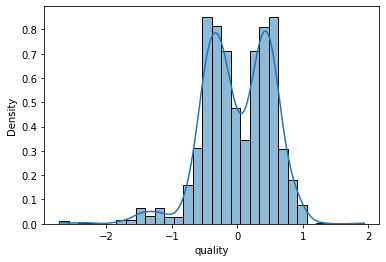

In [301]:
sns.histplot(residuals, kde = True, stat = "density")

In [302]:
# normalizado
std_residuals = (residuals - residuals.mean())/residuals.std()
std_residuals

369     0.866831
6243    1.009627
3374   -0.729061
1009    0.745711
220    -1.014190
          ...   
1757   -0.754036
5699   -0.620729
3875    0.197688
5584   -0.147005
884     0.817672
Name: quality, Length: 1300, dtype: float64

In [303]:
from scipy.stats import probplot

((array([-3.27247685, -3.01288906, -2.86838246, ...,  2.86838246,
          3.01288906,  3.27247685]),
  array([-5.18202568, -5.15143141, -4.54103221, ...,  2.01533949,
          2.41766999,  3.68227901])),
 (0.9797085083601256, 2.5703068201020946e-16, 0.977922479539936))

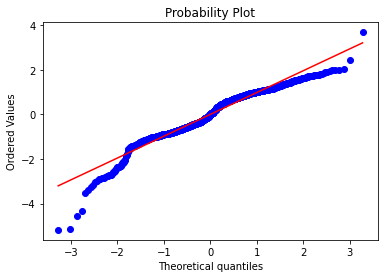

In [304]:
fig,ax = plt.subplots()
probplot(std_residuals, plot = ax, fit=True)

In [305]:
#Regressão logística

#Sabendo que os vinhos com notas >= 6 são considerados vinhos de boa qualidade
#faça um algoritmo que classifique os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas;
#Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas,
#além dos seus respectivos “achados”. Faça uma interpretação do resultado


#receita de bolo
#diga não a matança de pandas

In [306]:
features = [c for c in next_dataframe.columns if c != "quality"]
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'types_white',
 'best quality']

In [404]:
#clonado dataframe para novo teinamento com regressão logistica
import copy
logistic_regression = copy.deepcopy(next_dataframe)

In [405]:
for line in logistic_regression['quality']:
    if(line >= 6):
        logistic_regression['type_quality'] = 1 #bom
    else:
        logistic_regression['type_quality'] = 0 #ruim

In [406]:
logistic_regression.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,types_white,best quality,type_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1,0,1
1,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1,0,1
2,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1,0,1
3,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1,0,1
4,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1,0,1


In [407]:
logistic_regression.std()

fixed acidity           1.296434
volatile acidity        0.164636
citric acid             0.145318
residual sugar          4.757804
chlorides               0.035034
free sulfur dioxide    17.749400
density                 0.002999
pH                      0.160787
sulphates               0.148806
alcohol                 1.192712
quality                 0.873255
types_white             0.430779
best quality            0.397421
type_quality            0.000000
dtype: float64

In [408]:
#tramento de outiliers
logistic_regression.skew()

fixed acidity          1.723290
volatile acidity       1.495097
citric acid            0.471731
residual sugar         1.435404
chlorides              5.399828
free sulfur dioxide    1.220066
density                0.503602
pH                     0.386839
sulphates              1.797270
alcohol                0.565718
quality                0.189623
types_white           -1.179095
best quality           1.527553
type_quality           0.000000
dtype: float64

C:\Users\perei\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

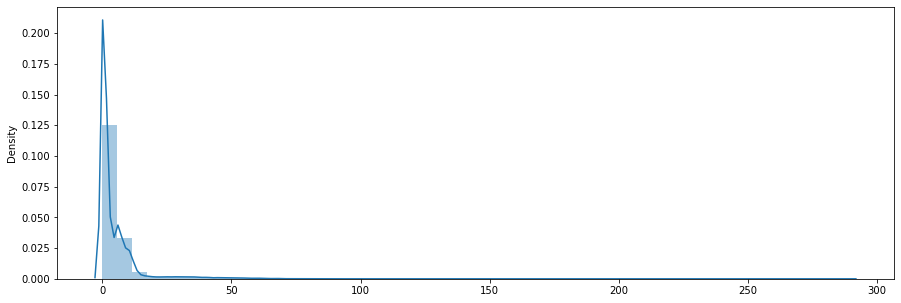

In [409]:
plt.figure(figsize=(15,5))
sns.distplot(logistic_regression)

C:\Users\perei\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

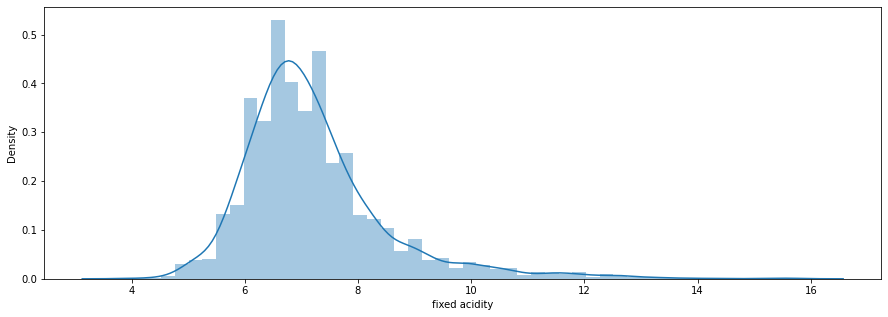

In [411]:
#outliersna cauda direita mais longa da distribuição em 'fixed acidity'
plt.figure(figsize=(15,5))
sns.distplot(logistic_regression['fixed acidity'])

C:\Users\perei\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

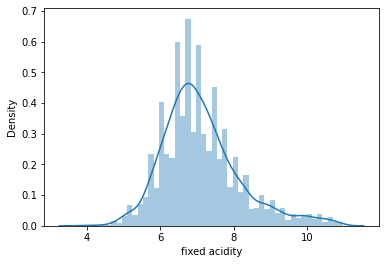

In [412]:
#usando um nive de significancia de 2%, asumindo uma distribuição e probabilidade mais ou menos normal
#removendo 2% dos dados vai rnos ajudar a lidar com os dados
q = logistic_regression['fixed acidity'].quantile(0.98)
logistic_regression = logistic_regression[logistic_regression['fixed acidity'] < q]

sns.distplot(logistic_regression['fixed acidity'])

C:\Users\perei\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

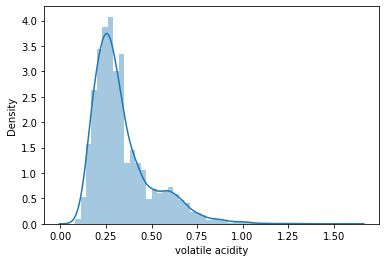

In [413]:
#repetindo esse tratamento para as demais colunas
sns.distplot(logistic_regression['volatile acidity'])

C:\Users\perei\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

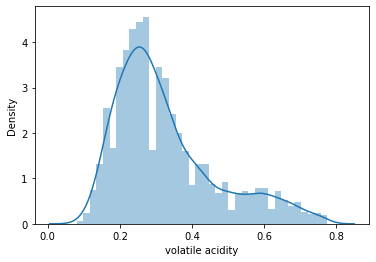

In [414]:
q = logistic_regression['volatile acidity'].quantile(0.98)
logistic_regression = logistic_regression[logistic_regression['volatile acidity'] < q]

sns.distplot(logistic_regression['volatile acidity'])

C:\Users\perei\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

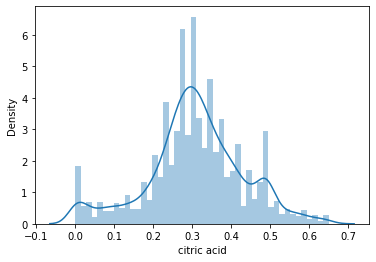

In [415]:
q = logistic_regression['citric acid'].quantile(0.98)
logistic_regression = logistic_regression[logistic_regression['citric acid'] < q]

sns.distplot(logistic_regression['citric acid'])

C:\Users\perei\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

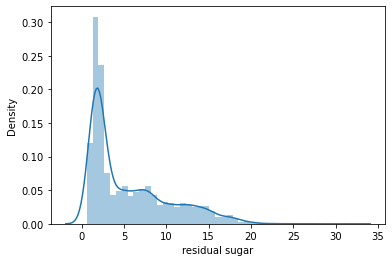

In [416]:
q = logistic_regression['residual sugar'].quantile(0.98)
df = logistic_regression[logistic_regression['residual sugar'] < q]

sns.distplot(logistic_regression['residual sugar'])

C:\Users\perei\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chlorides', ylabel='Density'>

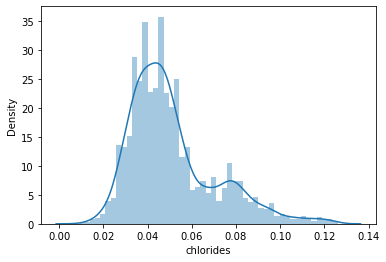

In [417]:
q = logistic_regression['chlorides'].quantile(0.98)
logistic_regression = logistic_regression[logistic_regression['chlorides'] < q]

sns.distplot(logistic_regression['chlorides'])

C:\Users\perei\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

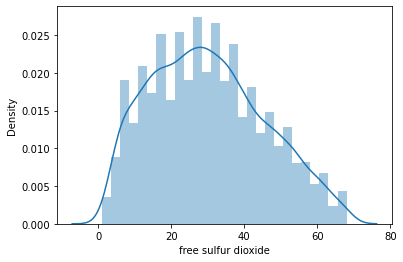

In [418]:
q = logistic_regression['free sulfur dioxide'].quantile(0.98)
logistic_regression = logistic_regression[logistic_regression['free sulfur dioxide'] < q]

sns.distplot(logistic_regression['free sulfur dioxide'])

C:\Users\perei\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='density', ylabel='Density'>

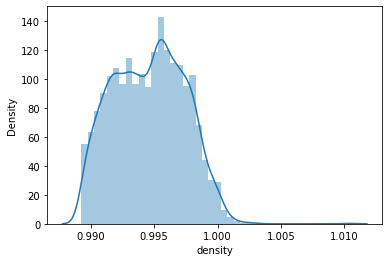

In [419]:
q = logistic_regression['density'].quantile(0.02)
logistic_regression = logistic_regression[logistic_regression['density'] > q]

sns.distplot(logistic_regression['density'])

C:\Users\perei\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

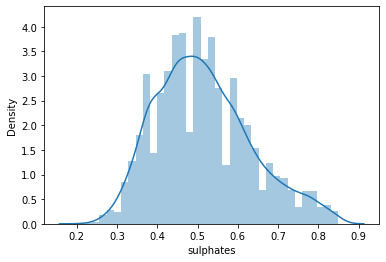

In [420]:
q = logistic_regression['sulphates'].quantile(0.98)
logistic_regression = logistic_regression[logistic_regression['sulphates'] < q]

sns.distplot(logistic_regression['sulphates'])

C:\Users\perei\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

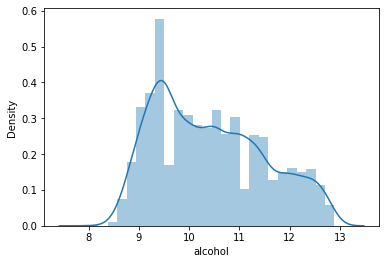

In [421]:
q = logistic_regression['alcohol'].quantile(0.98)
logistic_regression = logistic_regression[logistic_regression['alcohol'] < q]

sns.distplot(logistic_regression['alcohol'])

In [422]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

features = logistic_regression[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'density', 'pH', 'sulphates', 'alcohol',]]

x = add_constant(features)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif

C:\Users\perei\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,VIF,features
0,2.603443e+06,const
1,4.152459e+00,fixed acidity
2,2.078581e+00,volatile acidity
3,1.541620e+00,citric acid
4,9.446115e+00,residual sugar
5,2.603874e+00,chlorides
6,1.471044e+00,free sulfur dioxide
7,2.062660e+01,density
8,2.735809e+00,pH
9,1.490237e+00,sulphates


In [423]:
logistic_regression.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,types_white,best quality,type_quality
count,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.0
mean,7.093023,0.322671,0.306700,5.634148,0.051403,30.330080,0.994648,3.220452,0.514427,10.413541,5.810653,0.791317,0.187888,1.0
std,1.015512,0.142591,0.123368,4.786706,0.019581,15.610273,0.002760,0.157873,0.117079,1.091792,0.850154,0.406404,0.390658,0.0
min,3.800000,0.080000,0.000000,0.600000,0.012000,2.000000,0.989260,2.720000,0.230000,8.000000,3.000000,0.000000,0.000000,1.0
25%,6.400000,0.220000,0.250000,1.800000,0.038000,18.000000,0.992400,3.110000,0.430000,9.500000,5.000000,1.000000,0.000000,1.0
50%,7.000000,0.280000,0.310000,3.400000,0.047000,29.000000,0.994800,3.210000,0.500000,10.300000,6.000000,1.000000,0.000000,1.0
75%,7.600000,0.380000,0.380000,8.400000,0.059000,41.000000,0.996800,3.320000,0.590000,11.200000,6.000000,1.000000,0.000000,1.0
max,10.900000,0.775000,0.650000,31.600000,0.126000,68.000000,1.010300,4.010000,0.850000,12.893333,9.000000,1.000000,1.000000,1.0


In [424]:
#variavel depende x
#variavel independente y
logistic_regression_copy = copy.deepcopy(logistic_regression)
x = logistic_regression_copy.drop('quality', axis =1 )
y = logistic_regression_copy['quality']

In [425]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

In [426]:
#separando os dados de treino e teste
x_train,x_test,y_train,y_test = train_test_split(scaled_x, y ,test_size=0.2,random_state=40)

In [427]:
from sklearn.linear_model import LogisticRegression
#treinando o algoritimo
reg = LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\perei\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [428]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [429]:
y_hat = reg.predict(x_test)

In [430]:
#acuracia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_hat,y_test)
acuracia

0.7019143117593437